In [2]:
import torch
import numpy as np

import mdtraj as md
import nglview as nv

import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

from tqdm import tqdm


In [6]:
n_particles = 22
n_dimensions = 3
dim = n_particles * n_dimensions

file_name = "0411_192901"
state = "c5"
scaling = 1.4936519791

# Visualize samples

In [7]:
latent = torch.load(f"../res/{file_name}/result/latent-{state}.pt")
samples = torch.load(f"../res/{file_name}/result/samples-{state}.pt")
dlogp = torch.load(f"../res/{file_name}/result/dlogp-{state}.pt")
ad2_topology = md.load("../data/AD2/c5-tbg.pdb").topology
samples.shape

torch.Size([2000, 66])

In [10]:
samples_view = samples / scaling
traj = md.Trajectory(
	xyz=samples_view.cpu().detach().numpy().reshape(-1, n_particles, n_dimensions),
	topology=ad2_topology
)

In [11]:
view = nv.show_mdtraj(traj)
view

NGLWidget(max_frame=1999)

In [10]:
view.frame = 1000

# Dataset Ram plot

In [4]:
dataset = torch.load("../../../simulation/dataset/alanine/300.0/timelag-10n-v1/xyz-tbg.pt")

In [12]:
xyz_samples = dataset[:, 0].reshape(-1, n_particles, n_dimensions)
print(xyz_samples.shape)

torch.Size([10000, 22, 3])


In [13]:

ad2_topology = md.load("../data/AD2/c5.pdb").topology
traj_samples = md.Trajectory(xyz_samples, topology=ad2_topology)

phis = md.compute_phi(traj_samples)[1].flatten()
psis = md.compute_psi(traj_samples)[1].flatten()
print(phis.shape, psis.shape)

(10000,) (10000,)


Text(0, 0.5, 'Free energy / $k_B T$')

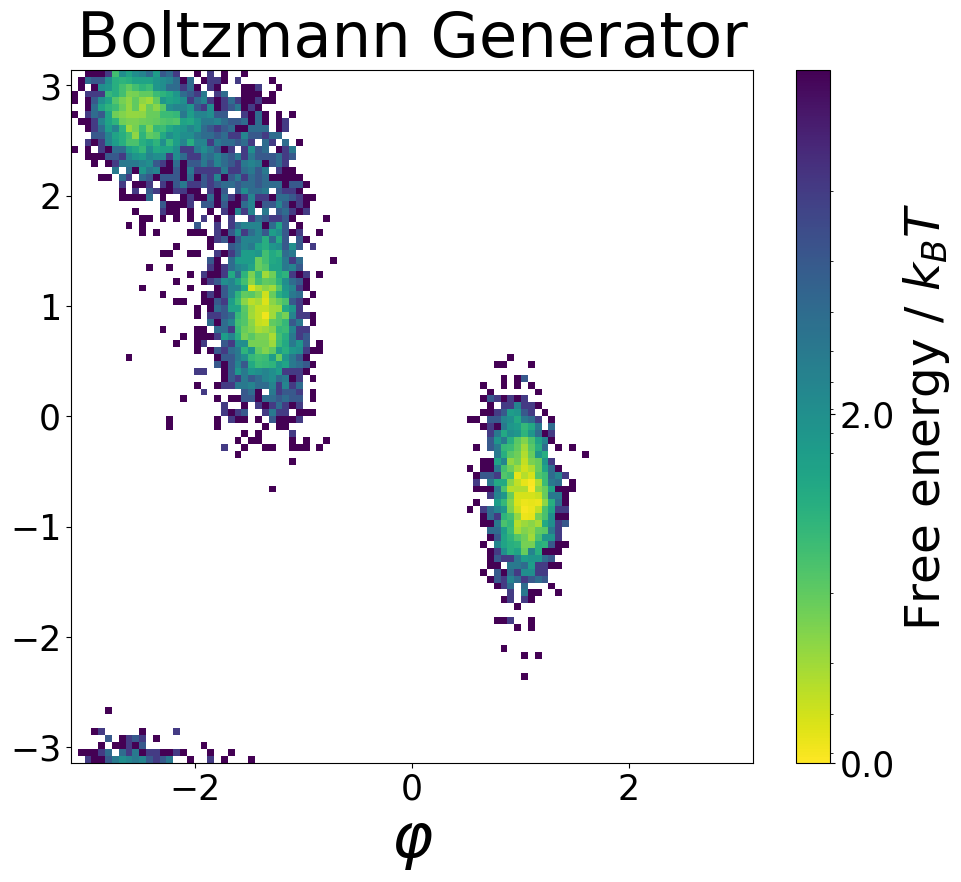

In [17]:

fig, ax = plt.subplots(figsize=(11, 9))
plot_range = [-np.pi, np.pi]

h, x_bins, y_bins, im = ax.hist2d(phis, psis, 100, norm=LogNorm(), range=[plot_range,plot_range],rasterized=True)
ticks = np.array([np.exp(-6)*h.max(), np.exp(-4.0)*h.max(),np.exp(-2)*h.max(), h.max()])
ax.set_xlabel(r"$\varphi$", fontsize=45)
ax.set_title("Boltzmann Generator", fontsize=45)
ax.xaxis.set_tick_params(labelsize=25)
ax.yaxis.set_tick_params(labelsize=25)

cbar = fig.colorbar(im, ticks=ticks)
cbar.ax.set_yticklabels([6.0,4.0,2.0,0.0], fontsize=25)
cbar.ax.invert_yaxis()
cbar.ax.set_ylabel(r"Free energy / $k_B T$", fontsize=35)

